In [1]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing



# Climate Data

In [2]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
# climate


# Weekly Climate Data

In [18]:
one_week_climate = pd.read_csv("Data/adults_one_week_climate.csv")
two_week_climate = pd.read_csv("Data/adults_two_week_climate.csv")


# Management Data

In [4]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
# management


# Landscape Data

## 500m Radius

In [5]:
cdl_500 = pd.read_csv("Data/Landscape/cdl_500_history.csv")
cdl_500 = cdl_500.drop("Unnamed: 0", axis=1)


## 1000m Radius

In [6]:
cdl_1000 = pd.read_csv("Data/Landscape/cdl_1000_history.csv")
cdl_1000 = cdl_1000.drop("Unnamed: 0", axis=1)


## 2000m Radius

In [7]:
cdl_2000 = pd.read_csv("Data/Landscape/cdl_2000_history.csv")
cdl_2000 = cdl_2000.drop("Unnamed: 0", axis=1)


## 3000m Radius

In [8]:
cdl_3000 = pd.read_csv("Data/Landscape/cdl_3000_history.csv")
cdl_3000 = cdl_3000.drop("Unnamed: 0", axis=1)


# Sticky Card Data

In [30]:
adults = pd.read_csv('Data/2023_scm_counts.csv')
adults = clean_columns(adults)
#adults["collection_date"] = pd.to_datetime(adults["collection_date"], format="%m/%d/%y")
#adults["week"] = adults["date"].dt.strftime("%U").astype(int)
adults = adults.drop(['initials'], axis=1)
adults = adults.dropna()
adults = adults.rename({'site':'record_id'}, axis=1)
adults['total_f_scm'] = adults['n_scm_i_f'] + adults['n_scm_o_f']
adults['total_m_scm'] = adults['n_scm_i_m'] + adults['n_scm_o_m']
adults['total_scm'] = adults['total_m_scm'] + adults['total_f_scm']
adults

,card_id,data_collector,record_id,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm
20,2246,Janice Degni,DEG_DIE_HILL,4/21/23,16.0,10.0,7.0,5.0,0.0,0.0,15.0,23.0,38.0
22,2266,Janice Degni,DEG_DIE_HILL,4/27/23,43.0,9.0,51.0,12.0,0.0,0.0,21.0,94.0,115.0
24,2374,Janice Degni,DEG_DIE_HILL,5/4/23,40.0,20.0,136.0,128.0,9.0,44.0,148.0,176.0,324.0
26,2560,Janice Degni,DEG_DIE_HILL,5/11/23,80.0,18.0,36.0,15.0,3.0,0.0,33.0,116.0,149.0
28,2558,Janice Degni,DEG_DIE_HILL,5/18/23,21.0,0.0,4.0,3.0,0.0,0.0,3.0,25.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,2270,Marion Zuefle,ZUE_REE,4/19/23,1.0,2.0,4.0,1.0,0.0,0.0,3.0,5.0,8.0
2239,2272,Marion Zuefle,ZUE_REE,4/26/23,44.0,34.0,21.0,34.0,0.0,0.0,68.0,65.0,133.0
2241,2384,Marion Zuefle,ZUE_REE,5/2/23,45.0,47.0,27.0,46.0,3.0,4.0,93.0,72.0,165.0
2245,2552,Marion Zuefle,ZUE_REE,5/17/23,38.0,21.0,5.0,3.0,4.0,2.0,24.0,43.0,67.0


# Create Table - All Features

In [31]:
adult_features = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(two_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(management, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_500, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_1000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_2000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_3000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)

adult_features.to_csv('Data/2023_adult_features.csv')

# Correlations

## Climate and Wire Mesh Data

In [32]:
adult_climate = adults.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
adult_climate = adult_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_climate


,card_id,data_collector,record_id,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,...,total_m_scm,total_scm,min_temp_f_1_week,ave_temp_f_1_week,max_temp_f_1_week,rain_inches_1_week,min_temp_f_2_week,ave_temp_f_2_week,max_temp_f_2_week,rain_inches_2_week
0,2246,Janice Degni,DEG_DIE_HILL,4/21/23,16.0,10.0,7.0,5.0,0.0,0.0,...,23.0,38.0,40.4875,52.5750,64.6875,0.63,36.000000,48.546667,61.106667,0.63
1,2266,Janice Degni,DEG_DIE_HILL,4/27/23,43.0,9.0,51.0,12.0,0.0,0.0,...,94.0,115.0,35.9625,46.4125,56.8625,0.69,39.193333,50.920000,62.660000,1.32
2,2374,Janice Degni,DEG_DIE_HILL,5/4/23,40.0,20.0,136.0,128.0,9.0,44.0,...,176.0,324.0,37.4125,44.4375,51.4875,3.11,36.940000,45.713333,54.500000,3.69
3,2560,Janice Degni,DEG_DIE_HILL,5/11/23,80.0,18.0,36.0,15.0,3.0,0.0,...,116.0,149.0,36.0625,47.6000,59.1000,0.36,36.766667,46.380000,55.993333,3.33
4,2558,Janice Degni,DEG_DIE_HILL,5/18/23,21.0,0.0,4.0,3.0,0.0,0.0,...,25.0,28.0,36.8750,51.4625,66.0375,0.00,36.460000,49.460000,62.426667,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2270,Marion Zuefle,ZUE_REE,4/19/23,1.0,2.0,4.0,1.0,0.0,0.0,...,5.0,8.0,47.8125,59.8875,72.0125,0.39,41.406667,52.953333,64.533333,1.56
430,2272,Marion Zuefle,ZUE_REE,4/26/23,44.0,34.0,21.0,34.0,0.0,0.0,...,65.0,133.0,38.5750,47.5625,56.5125,1.15,43.733333,54.706667,65.686667,1.54
431,2384,Marion Zuefle,ZUE_REE,5/2/23,45.0,47.0,27.0,46.0,3.0,4.0,...,72.0,165.0,38.3750,45.9500,53.4750,1.94,38.926667,47.433333,55.906667,2.91
432,2552,Marion Zuefle,ZUE_REE,5/17/23,38.0,21.0,5.0,3.0,4.0,2.0,...,43.0,67.0,45.5250,57.7375,69.9750,0.00,43.120000,53.773333,64.433333,0.55


In [37]:
adult_climate_subset = adult_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
    ]
]

adult_climate_subset["collection_date"] = pd.to_datetime(
    adult_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_32911/2999537200.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_climate_subset["collection_date"] = pd.to_datetime(


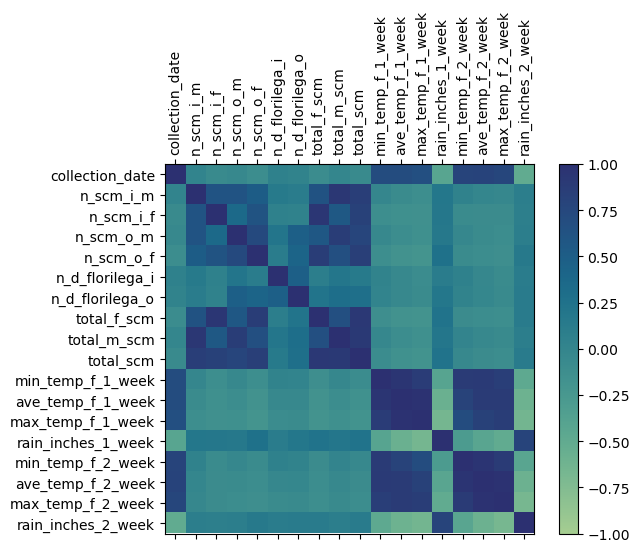

In [38]:
corr = adult_climate_subset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap="crest", vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(adult_climate_subset.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(adult_climate_subset.columns)
ax.set_yticklabels(adult_climate_subset.columns)
plt.show()


In [39]:
corr.style.background_gradient(cmap="crest").format(precision=2)

,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm,min_temp_f_1_week,ave_temp_f_1_week,max_temp_f_1_week,rain_inches_1_week,min_temp_f_2_week,ave_temp_f_2_week,max_temp_f_2_week,rain_inches_2_week
collection_date,1.00,0.01,-0.08,-0.05,-0.11,0.05,0.03,-0.10,-0.01,-0.06,0.70,0.70,0.66,-0.43,0.79,0.79,0.76,-0.51
n_scm_i_m,0.01,1.00,0.61,0.61,0.51,0.15,0.11,0.63,0.93,0.84,-0.02,-0.09,-0.12,0.18,0.04,-0.01,-0.04,0.08
n_scm_i_f,-0.08,0.61,1.00,0.36,0.62,0.05,0.04,0.93,0.56,0.83,-0.12,-0.14,-0.15,0.18,-0.08,-0.09,-0.09,0.08
n_scm_o_m,-0.05,0.61,0.36,1.00,0.73,0.20,0.48,0.57,0.86,0.78,-0.05,-0.11,-0.15,0.16,-0.04,-0.08,-0.11,0.08
n_scm_o_f,-0.11,0.51,0.62,0.73,1.00,0.11,0.42,0.86,0.67,0.84,-0.12,-0.18,-0.21,0.26,-0.09,-0.12,-0.13,0.15
n_d_florilega_i,0.05,0.15,0.05,0.20,0.11,1.00,0.47,0.08,0.19,0.15,0.02,-0.05,-0.09,0.12,0.04,-0.03,-0.08,0.12
n_d_florilega_o,0.03,0.11,0.04,0.48,0.42,0.47,1.00,0.22,0.30,0.28,0.01,-0.05,-0.08,0.19,0.02,-0.03,-0.06,0.13
total_f_scm,-0.10,0.63,0.93,0.57,0.86,0.08,0.22,1.00,0.67,0.92,-0.13,-0.18,-0.19,0.23,-0.09,-0.11,-0.12,0.12
total_m_scm,-0.01,0.93,0.56,0.86,0.67,0.19,0.30,0.67,1.00,0.91,-0.04,-0.11,-0.15,0.19,0.01,-0.04,-0.08,0.09
total_scm,-0.06,0.84,0.83,0.78,0.84,0.15,0.28,0.92,0.91,1.00,-0.09,-0.16,-0.19,0.23,-0.05,-0.09,-0.11,0.12


## Landscape and Wire Mesh Data

### 500m

In [71]:
adults_500 = adults.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_500 = adults_500.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_500["collection_date"] = pd.to_datetime(
    adults_500["collection_date"], format="%m/%d/%y"
)

In [73]:
corr = adults_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm,ag_prop_2018_500,nat_prop_2018_500,semi_nat_prop_2018_500,corn_prop_2018_500,soybean_prop_2018_500,wheat_prop_2018_500,forest_prop_2018_500,ag_prop_2019_500,nat_prop_2019_500,semi_nat_prop_2019_500,corn_prop_2019_500,soybean_prop_2019_500,wheat_prop_2019_500,forest_prop_2019_500,ag_prop_2020_500,nat_prop_2020_500,semi_nat_prop_2020_500,corn_prop_2020_500,soybean_prop_2020_500,wheat_prop_2020_500,forest_prop_2020_500,ag_prop_2021_500,nat_prop_2021_500,semi_nat_prop_2021_500,corn_prop_2021_500,soybean_prop_2021_500,wheat_prop_2021_500,forest_prop_2021_500,ag_prop_2022_500,nat_prop_2022_500,semi_nat_prop_2022_500,corn_prop_2022_500,soybean_prop_2022_500,wheat_prop_2022_500,forest_prop_2022_500,ag_prop_2 year_500,ag_prop_3 year_500,ag_prop_4 year_500,ag_prop_5 year_500,nat_prop_2 year_500,nat_prop_3 year_500,nat_prop_4 year_500,nat_prop_5 year_500,semi_nat_prop_2 year_500,semi_nat_prop_3 year_500,semi_nat_prop_4 year_500,semi_nat_prop_5 year_500,corn_prop_2 year_500,corn_prop_3 year_500,corn_prop_4 year_500,corn_prop_5 year_500,soybean_prop_2 year_500,soybean_prop_3 year_500,soybean_prop_4 year_500,soybean_prop_5 year_500,wheat_prop_2 year_500,wheat_prop_3 year_500,wheat_prop_4 year_500,wheat_prop_5 year_500,forest_prop_2 year_500,forest_prop_3 year_500,forest_prop_4 year_500,forest_prop_5 year_500
collection_date,1.00,0.01,-0.08,-0.05,-0.11,0.05,0.02,-0.10,-0.02,-0.07,0.01,-0.04,-0.04,-0.06,0.07,0.05,-0.04,-0.00,-0.03,-0.09,0.03,0.02,-0.00,-0.04,0.01,-0.03,-0.08,0.06,0.00,0.06,-0.05,0.01,-0.03,-0.08,0.06,0.00,0.06,-0.05,0.04,-0.03,-0.08,0.01,0.04,0.03,-0.05,0.03,0.02,0.02,0.01,-0.03,-0.03,-0.03,-0.03,-0.08,-0.08,-0.08,-0.08,0.04,0.05,0.05,0.02,0.03,0.02,0.02,0.03,0.05,0.06,0.05,0.05,-0.05,-0.05,-0.05,-0.05
n_scm_i_m,0.01,1.00,0.61,0.61,0.51,0.15,0.11,0.63,0.93,0.84,0.13,-0.02,0.02,0.05,0.11,0.07,-0.09,0.11,-0.04,-0.02,0.10,0.00,0.03,-0.08,0.13,-0.04,-0.06,0.10,0.04,0.08,-0.08,0.13,-0.04,-0.06,0.10,0.04,0.08,-0.08,0.03,-0.04,-0.06,0.15,0.04,0.02,-0.08,0.08,0.10,0.10,0.11,-0.04,-0.04,-0.04,-0.04,-0.06,-0.06,-0.05,-0.04,0.13,0.12,0.13,0.12,0.05,0.05,0.04,0.06,0.05,0.06,0.07,0.07,-0.08,-0.08,-0.08,-0.08
n_scm_i_f,-0.08,0.61,1.00,0.36,0.62,0.05,0.04,0.93,0.56,0.83,0.05,0.04,-0.01,0.14,-0.05,-0.05,-0.03,0.07,0.02,-0.03,0.14,-0.03,-0.05,-0.01,0.06,0.02,-0.08,0.13,-0.03,-0.03,-0.00,0.06,0.02,-0.08,0.13,-0.03,-0.03,-0.00,0.01,0.02,-0.07,0.14,-0.04,-0.03,-0.00,0.04,0.05,0.05,0.05,0.02,0.02,0.02,0.03,-0.07,-0.07,-0.06,-0.06,0.15,0.14,0.15,0.16,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.05,-0.00,-0.00,-0.00,-0.01
n_scm_o_m,-0.05,0.61,0.36,1.00,0.73,0.20,0.48,0.57,0.86,0.78,0.24,-0.13,0.04,0.10,0.14,0.08,-0.16,0.23,-0.15,-0.02,0.17,0.02,0.04,-0.17,0.23,-0.14,-0.06,0.16,0.03,0.13,-0.15,0.23,-0.14,-0.06,0.16,0.03,0.13,-0.15,0.16,-0.14,-0.08,0.24,0.06,0.00,-0.15,0.20,0.21,0.22,0.23,-0.14,-0.14,-0.14,-0.14,-0.07,-0.07,-0.06,-0.04,0.22,0.20,0.20,0.19,0.06,0.05,0.04,0.07,0.07,0.09,0.09,0.10,-0.15,-0.15,-0.16,-0.16
n_scm_o_f,-0.11,0.51,0.62,0.73,1.00,0.11,0.42,0.86,0.67,0.84,0.11,-0.01,0.01,0.12,0.01,-0.02,-0.06,0.14,-0.03,-0.03,0.17,-0.01,-0.03,-0.05,0.13,-0.02,-0.08,0.14,-0.02,0.03,-0.04,0.13,-0.02,-0.08,0.14,-0.02,0.03,-0.04,0.07,-0.03,-0.09,0.19,0.00,-0.04,-0.04,0.10,0.11,0.12,0.12,-0.02,-0.02,-0.02,-0.02,-0.08,-0.08,-0.07,-0.06,0.18,0.17,0.18,0.18,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,-0.01,-0.04,-0.04,-0.04,-0.05
n_d_florilega_i,0.05,0.15,0.05,0.20,0.11,1.00,0.47,0.08,0.19,0.15,0.19,-0.08,-0.02,-0.02,0.14,0.30,-0.07,0.15,-0.08,-0.07,0.08,-0.01,0.06,-0.08,0.17,-0.08,-0.10,0.03,0.09,0.17,-0.08,0.17,-0.08,-0.10,0.03,0.09,0.17,-0.08,0.11,-0.08,-0.12,0.12,0.07,0.02,-0.08,0.14,0.15,0.15,0.16,-0.08,-0.08,-0.08,-0.08,-0.11,-0.11,-0.10,-0.09,0.08,0.07,0.07,0.06,0.09,0.09,0.07,0.09,0.10,0.13,0.13,0.17,-0.08,-0.08,-0.08,-0.08
n_d_florilega_o,0.02,0.11,0.04,0.48,0.42,0.47,1.00,0.22,0.30,0.28,0.12,-0.10,0.05,-0.01,0.18,0.09,-0.10,

### 1000m

In [74]:
adults_1000 = adults.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_1000 = adults_1000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_1000["collection_date"] = pd.to_datetime(
    adults_1000["collection_date"], format="%m/%d/%y"
)

In [75]:
corr = adults_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm,ag_prop_2018_1000,nat_prop_2018_1000,semi_nat_prop_2018_1000,corn_prop_2018_1000,soybean_prop_2018_1000,wheat_prop_2018_1000,forest_prop_2018_1000,ag_prop_2019_1000,nat_prop_2019_1000,semi_nat_prop_2019_1000,corn_prop_2019_1000,soybean_prop_2019_1000,wheat_prop_2019_1000,forest_prop_2019_1000,ag_prop_2020_1000,nat_prop_2020_1000,semi_nat_prop_2020_1000,corn_prop_2020_1000,soybean_prop_2020_1000,wheat_prop_2020_1000,forest_prop_2020_1000,ag_prop_2021_1000,nat_prop_2021_1000,semi_nat_prop_2021_1000,corn_prop_2021_1000,soybean_prop_2021_1000,wheat_prop_2021_1000,forest_prop_2021_1000,ag_prop_2022_1000,nat_prop_2022_1000,semi_nat_prop_2022_1000,corn_prop_2022_1000,soybean_prop_2022_1000,wheat_prop_2022_1000,forest_prop_2022_1000,ag_prop_2 year_1000,ag_prop_3 year_1000,ag_prop_4 year_1000,ag_prop_5 year_1000,nat_prop_2 year_1000,nat_prop_3 year_1000,nat_prop_4 year_1000,nat_prop_5 year_1000,semi_nat_prop_2 year_1000,semi_nat_prop_3 year_1000,semi_nat_prop_4 year_1000,semi_nat_prop_5 year_1000,corn_prop_2 year_1000,corn_prop_3 year_1000,corn_prop_4 year_1000,corn_prop_5 year_1000,soybean_prop_2 year_1000,soybean_prop_3 year_1000,soybean_prop_4 year_1000,soybean_prop_5 year_1000,wheat_prop_2 year_1000,wheat_prop_3 year_1000,wheat_prop_4 year_1000,wheat_prop_5 year_1000,forest_prop_2 year_1000,forest_prop_3 year_1000,forest_prop_4 year_1000,forest_prop_5 year_1000
collection_date,1.00,0.01,-0.08,-0.05,-0.11,0.05,0.02,-0.10,-0.02,-0.07,-0.06,0.04,-0.01,-0.11,0.03,0.05,0.03,-0.07,0.04,-0.08,-0.04,0.02,-0.02,0.03,-0.06,0.04,-0.05,-0.01,0.02,0.06,0.02,-0.06,0.04,-0.05,-0.01,0.02,0.06,0.02,-0.05,0.04,-0.05,-0.04,0.00,0.05,0.02,-0.05,-0.06,-0.06,-0.06,0.04,0.04,0.04,0.04,-0.05,-0.05,-0.06,-0.05,-0.03,-0.02,-0.03,-0.05,0.01,0.02,0.02,0.02,0.06,0.06,0.05,0.05,0.02,0.02,0.02,0.03
n_scm_i_m,0.01,1.00,0.61,0.61,0.51,0.15,0.11,0.63,0.93,0.84,0.12,-0.06,0.01,0.08,0.07,0.08,-0.10,0.11,-0.07,-0.03,0.13,-0.03,0.03,-0.10,0.11,-0.07,-0.06,0.04,0.03,0.13,-0.10,0.11,-0.07,-0.06,0.04,0.03,0.13,-0.10,0.02,-0.08,-0.09,0.10,0.04,0.07,-0.10,0.07,0.08,0.09,0.10,-0.07,-0.07,-0.07,-0.07,-0.08,-0.07,-0.07,-0.05,0.07,0.06,0.08,0.08,0.04,0.04,0.02,0.03,0.11,0.12,0.11,0.11,-0.10,-0.10,-0.10,-0.10
n_scm_i_f,-0.08,0.61,1.00,0.36,0.62,0.05,0.04,0.93,0.56,0.83,0.06,0.01,-0.01,0.11,-0.02,-0.04,-0.04,0.07,-0.00,-0.01,0.16,-0.06,-0.04,-0.03,0.06,-0.00,-0.05,0.06,-0.03,0.09,-0.02,0.06,-0.00,-0.05,0.06,-0.03,0.09,-0.02,0.01,-0.01,-0.06,0.10,-0.02,-0.03,-0.02,0.03,0.04,0.05,0.05,-0.00,-0.00,-0.00,-0.00,-0.06,-0.05,-0.04,-0.04,0.08,0.08,0.10,0.10,-0.02,-0.03,-0.04,-0.04,0.04,0.06,0.04,0.02,-0.02,-0.02,-0.02,-0.03
n_scm_o_m,-0.05,0.61,0.36,1.00,0.73,0.20,0.48,0.57,0.86,0.78,0.25,-0.21,0.05,0.20,0.12,0.14,-0.21,0.25,-0.22,-0.00,0.22,0.06,0.09,-0.23,0.25,-0.22,-0.04,0.17,0.08,0.17,-0.22,0.25,-0.22,-0.04,0.17,0.08,0.17,-0.22,0.18,-0.22,-0.08,0.21,0.09,0.08,-0.22,0.22,0.24,0.24,0.24,-0.22,-0.22,-0.22,-0.22,-0.06,-0.06,-0.05,-0.03,0.20,0.19,0.20,0.21,0.09,0.09,0.08,0.09,0.14,0.15,0.15,0.16,-0.22,-0.22,-0.22,-0.22
n_scm_o_f,-0.11,0.51,0.62,0.73,1.00,0.11,0.42,0.86,0.67,0.84,0.15,-0.10,0.04,0.18,0.04,0.02,-0.13,0.16,-0.11,0.02,0.21,0.04,0.00,-0.13,0.15,-0.11,-0.04,0.12,0.03,0.15,-0.11,0.15,-0.11,-0.04,0.12,0.03,0.15,-0.11,0.10,-0.11,-0.06,0.16,0.04,0.00,-0.12,0.13,0.14,0.15,0.15,-0.11,-0.11,-0.11,-0.10,-0.05,-0.05,-0.04,-0.02,0.15,0.14,0.16,0.17,0.04,0.04,0.04,0.04,0.09,0.12,0.10,0.09,-0.12,-0.12,-0.12,-0.12
n_d_florilega_i,0.05,0.15,0.05,0.20,0.11,1.00,0.47,0.08,0.19,0.15,0.19,-0.10,0.02,0.04,0.11,0.29,-0.09,0.17,-0.10,-0.07,0.11,-0.01,0.14,-0.11,0.18,-0.10,-0.08,0.10,0.04,0.09,-0.11,0.18,-0.10,-0.08,0.10,0.04,0.09,-0.11,0.12,-0.10,-0.10,0.12,0.07,0.10,-0.11,0.15,0.16,0.16,0.17,-0.10,-0.10,-0.10,-0.10,-0.09,-0.09,-0.09,-0.07,0.11,0.11,0.11,0.10,0.06,0.06,0.04,0.06,0.10,0.10,0.11,0.16,-0.11,-0.11,-0.11,-0.10
n_d_florilega_o,0.02,0.11,0.04,0.48,0.42,0.47,1.00,0.22,

### 2000m

In [76]:
adults_2000 = adults.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_2000 = adults_2000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_2000["collection_date"] = pd.to_datetime(
    adults_2000["collection_date"], format="%m/%d/%y"
)

In [77]:
corr = adults_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm,ag_prop_2018_2000,nat_prop_2018_2000,semi_nat_prop_2018_2000,corn_prop_2018_2000,soybean_prop_2018_2000,wheat_prop_2018_2000,forest_prop_2018_2000,ag_prop_2019_2000,nat_prop_2019_2000,semi_nat_prop_2019_2000,corn_prop_2019_2000,soybean_prop_2019_2000,wheat_prop_2019_2000,forest_prop_2019_2000,ag_prop_2020_2000,nat_prop_2020_2000,semi_nat_prop_2020_2000,corn_prop_2020_2000,soybean_prop_2020_2000,wheat_prop_2020_2000,forest_prop_2020_2000,ag_prop_2021_2000,nat_prop_2021_2000,semi_nat_prop_2021_2000,corn_prop_2021_2000,soybean_prop_2021_2000,wheat_prop_2021_2000,forest_prop_2021_2000,ag_prop_2022_2000,nat_prop_2022_2000,semi_nat_prop_2022_2000,corn_prop_2022_2000,soybean_prop_2022_2000,wheat_prop_2022_2000,forest_prop_2022_2000,ag_prop_2 year_2000,ag_prop_3 year_2000,ag_prop_4 year_2000,ag_prop_5 year_2000,nat_prop_2 year_2000,nat_prop_3 year_2000,nat_prop_4 year_2000,nat_prop_5 year_2000,semi_nat_prop_2 year_2000,semi_nat_prop_3 year_2000,semi_nat_prop_4 year_2000,semi_nat_prop_5 year_2000,corn_prop_2 year_2000,corn_prop_3 year_2000,corn_prop_4 year_2000,corn_prop_5 year_2000,soybean_prop_2 year_2000,soybean_prop_3 year_2000,soybean_prop_4 year_2000,soybean_prop_5 year_2000,wheat_prop_2 year_2000,wheat_prop_3 year_2000,wheat_prop_4 year_2000,wheat_prop_5 year_2000,forest_prop_2 year_2000,forest_prop_3 year_2000,forest_prop_4 year_2000,forest_prop_5 year_2000
collection_date,1.00,0.01,-0.08,-0.05,-0.11,0.05,0.02,-0.10,-0.02,-0.07,-0.02,0.02,-0.04,-0.04,0.04,0.06,0.03,-0.03,0.03,-0.12,-0.03,0.02,0.03,0.01,-0.02,0.04,-0.11,-0.02,0.04,0.05,0.02,-0.02,0.04,-0.11,-0.02,0.04,0.05,0.02,-0.02,0.04,-0.12,-0.02,0.03,0.04,0.02,-0.02,-0.02,-0.02,-0.02,0.04,0.04,0.04,0.03,-0.12,-0.12,-0.12,-0.11,-0.02,-0.02,-0.03,-0.03,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02
n_scm_i_m,0.01,1.00,0.61,0.61,0.51,0.15,0.11,0.63,0.93,0.84,0.11,-0.09,-0.02,0.07,0.07,0.06,-0.12,0.10,-0.10,-0.04,0.07,-0.01,0.08,-0.12,0.09,-0.11,-0.06,0.03,0.02,0.11,-0.12,0.09,-0.11,-0.06,0.03,0.02,0.11,-0.12,0.01,-0.11,-0.08,0.05,0.07,0.09,-0.12,0.05,0.06,0.07,0.08,-0.11,-0.11,-0.11,-0.10,-0.07,-0.07,-0.06,-0.06,0.04,0.04,0.05,0.05,0.05,0.04,0.03,0.04,0.10,0.11,0.10,0.10,-0.12,-0.12,-0.12,-0.12
n_scm_i_f,-0.08,0.61,1.00,0.36,0.62,0.05,0.04,0.93,0.56,0.83,0.03,0.01,-0.03,0.05,-0.03,-0.05,-0.04,0.03,-0.01,0.02,0.07,-0.06,-0.03,-0.04,0.02,-0.01,0.00,0.02,-0.04,0.04,-0.03,0.02,-0.01,0.00,0.02,-0.04,0.04,-0.03,-0.02,-0.02,-0.01,0.02,-0.01,-0.02,-0.04,-0.00,0.00,0.01,0.01,-0.02,-0.01,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,0.02,0.02,0.03,0.04,-0.02,-0.03,-0.04,-0.04,0.01,0.02,0.01,-0.00,-0.04,-0.04,-0.04,-0.04
n_scm_o_m,-0.05,0.61,0.36,1.00,0.73,0.20,0.48,0.57,0.86,0.78,0.25,-0.22,-0.01,0.22,0.20,0.16,-0.21,0.24,-0.23,-0.06,0.19,0.14,0.17,-0.23,0.25,-0.23,-0.09,0.19,0.16,0.17,-0.23,0.25,-0.23,-0.09,0.19,0.16,0.17,-0.23,0.19,-0.23,-0.12,0.21,0.15,0.13,-0.23,0.22,0.23,0.23,0.24,-0.23,-0.23,-0.23,-0.23,-0.11,-0.10,-0.09,-0.08,0.21,0.20,0.20,0.21,0.16,0.16,0.16,0.17,0.16,0.17,0.17,0.18,-0.23,-0.23,-0.23,-0.23
n_scm_o_f,-0.11,0.51,0.62,0.73,1.00,0.11,0.42,0.86,0.67,0.84,0.14,-0.10,-0.02,0.15,0.10,0.04,-0.13,0.13,-0.12,-0.00,0.14,0.08,0.03,-0.14,0.13,-0.12,-0.04,0.12,0.08,0.11,-0.13,0.13,-0.12,-0.04,0.12,0.08,0.11,-0.13,0.09,-0.12,-0.05,0.12,0.07,0.01,-0.13,0.11,0.12,0.12,0.13,-0.12,-0.12,-0.12,-0.11,-0.05,-0.05,-0.04,-0.04,0.13,0.13,0.13,0.14,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.07,-0.13,-0.13,-0.13,-0.13
n_d_florilega_i,0.05,0.15,0.05,0.20,0.11,1.00,0.47,0.08,0.19,0.15,0.21,-0.14,0.06,0.12,0.11,0.29,-0.13,0.20,-0.14,-0.05,0.13,0.03,0.20,-0.15,0.20,-0.14,-0.09,0.11,0.07,0.06,-0.15,0.20,-0.14,-0.09,0.11,0.07,0.06,-0.15,0.15,-0.14,-0.11,0.15,0.10,0.19,-0.15,0.18,0.19,0.19,0.20,-0.14,-0.14,-0.14,-0.14,-0.10,-0.10,-0.09,-0.07,0.13,0.13,0.13,0.13,0.09,0.09,0.08,0.08,0.13,0.11,0.13,0.17,-0.15,-0.15,-0.15,-0.14
n_d_florilega_o,0.02,0.11,0.04,0.48,0.42,0.47,1.00,0.22

### 3000m

In [79]:
adults_3000 = adults.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_3000 = adults_3000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_3000["collection_date"] = pd.to_datetime(
    adults_3000["collection_date"], format="%m/%d/%y"
)

In [80]:
corr = adults_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

,collection_date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_f_scm,total_m_scm,total_scm,ag_prop_2018_3000,nat_prop_2018_3000,semi_nat_prop_2018_3000,corn_prop_2018_3000,soybean_prop_2018_3000,wheat_prop_2018_3000,forest_prop_2018_3000,ag_prop_2019_3000,nat_prop_2019_3000,semi_nat_prop_2019_3000,corn_prop_2019_3000,soybean_prop_2019_3000,wheat_prop_2019_3000,forest_prop_2019_3000,ag_prop_2020_3000,nat_prop_2020_3000,semi_nat_prop_2020_3000,corn_prop_2020_3000,soybean_prop_2020_3000,wheat_prop_2020_3000,forest_prop_2020_3000,ag_prop_2021_3000,nat_prop_2021_3000,semi_nat_prop_2021_3000,corn_prop_2021_3000,soybean_prop_2021_3000,wheat_prop_2021_3000,forest_prop_2021_3000,ag_prop_2022_3000,nat_prop_2022_3000,semi_nat_prop_2022_3000,corn_prop_2022_3000,soybean_prop_2022_3000,wheat_prop_2022_3000,forest_prop_2022_3000,ag_prop_2 year_3000,ag_prop_3 year_3000,ag_prop_4 year_3000,ag_prop_5 year_3000,nat_prop_2 year_3000,nat_prop_3 year_3000,nat_prop_4 year_3000,nat_prop_5 year_3000,semi_nat_prop_2 year_3000,semi_nat_prop_3 year_3000,semi_nat_prop_4 year_3000,semi_nat_prop_5 year_3000,corn_prop_2 year_3000,corn_prop_3 year_3000,corn_prop_4 year_3000,corn_prop_5 year_3000,soybean_prop_2 year_3000,soybean_prop_3 year_3000,soybean_prop_4 year_3000,soybean_prop_5 year_3000,wheat_prop_2 year_3000,wheat_prop_3 year_3000,wheat_prop_4 year_3000,wheat_prop_5 year_3000,forest_prop_2 year_3000,forest_prop_3 year_3000,forest_prop_4 year_3000,forest_prop_5 year_3000
collection_date,1.00,0.01,-0.08,-0.05,-0.11,0.05,0.02,-0.10,-0.02,-0.07,-0.00,-0.04,-0.02,-0.01,0.04,0.05,-0.02,-0.01,-0.03,-0.10,-0.00,0.03,0.03,-0.04,0.00,-0.03,-0.08,0.01,0.03,0.03,-0.04,0.00,-0.03,-0.08,0.01,0.03,0.03,-0.04,0.01,-0.02,-0.09,0.00,0.04,0.04,-0.04,0.01,0.01,0.00,0.00,-0.02,-0.03,-0.03,-0.03,-0.09,-0.08,-0.09,-0.08,0.01,0.01,0.00,0.00,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,-0.04,-0.04,-0.04,-0.04
n_scm_i_m,0.01,1.00,0.61,0.61,0.51,0.15,0.11,0.63,0.93,0.84,0.10,-0.07,-0.08,0.07,0.06,0.07,-0.11,0.10,-0.08,-0.11,0.05,0.04,0.10,-0.12,0.08,-0.09,-0.12,0.02,0.05,0.10,-0.11,0.08,-0.09,-0.12,0.02,0.05,0.10,-0.11,0.01,-0.09,-0.14,0.04,0.05,0.11,-0.11,0.05,0.06,0.07,0.07,-0.09,-0.09,-0.09,-0.08,-0.13,-0.13,-0.13,-0.12,0.03,0.03,0.03,0.04,0.05,0.05,0.05,0.05,0.11,0.10,0.11,0.10,-0.11,-0.11,-0.11,-0.11
n_scm_i_f,-0.08,0.61,1.00,0.36,0.62,0.05,0.04,0.93,0.56,0.83,0.00,0.05,-0.06,0.00,-0.04,-0.03,-0.02,0.00,0.03,-0.01,0.01,-0.05,-0.04,-0.01,-0.01,0.03,-0.02,-0.03,-0.04,0.00,-0.01,-0.01,0.03,-0.02,-0.03,-0.04,0.00,-0.01,-0.05,0.03,-0.02,-0.03,-0.04,-0.01,-0.01,-0.03,-0.03,-0.02,-0.02,0.03,0.03,0.03,0.03,-0.02,-0.02,-0.02,-0.03,-0.03,-0.03,-0.02,-0.02,-0.04,-0.04,-0.05,-0.04,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
n_scm_o_m,-0.05,0.61,0.36,1.00,0.73,0.20,0.48,0.57,0.86,0.78,0.26,-0.19,-0.04,0.24,0.21,0.16,-0.20,0.24,-0.21,-0.09,0.20,0.20,0.17,-0.21,0.25,-0.21,-0.14,0.21,0.19,0.20,-0.21,0.25,-0.21,-0.14,0.21,0.19,0.20,-0.21,0.19,-0.21,-0.16,0.22,0.17,0.17,-0.21,0.23,0.23,0.24,0.24,-0.21,-0.21,-0.21,-0.21,-0.15,-0.15,-0.14,-0.13,0.22,0.22,0.21,0.22,0.18,0.19,0.19,0.20,0.20,0.20,0.20,0.19,-0.21,-0.21,-0.21,-0.21
n_scm_o_f,-0.11,0.51,0.62,0.73,1.00,0.11,0.42,0.86,0.67,0.84,0.13,-0.06,-0.04,0.13,0.10,0.05,-0.11,0.11,-0.08,-0.03,0.10,0.08,0.02,-0.11,0.12,-0.08,-0.07,0.09,0.08,0.10,-0.11,0.12,-0.08,-0.07,0.09,0.08,0.10,-0.11,0.08,-0.08,-0.07,0.11,0.08,0.04,-0.11,0.10,0.11,0.11,0.11,-0.08,-0.08,-0.08,-0.08,-0.07,-0.07,-0.06,-0.06,0.10,0.10,0.10,0.11,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.07,-0.11,-0.11,-0.11,-0.11
n_d_florilega_i,0.05,0.15,0.05,0.20,0.11,1.00,0.47,0.08,0.19,0.15,0.17,-0.11,0.06,0.12,0.09,0.22,-0.11,0.17,-0.10,-0.08,0.13,0.05,0.24,-0.12,0.17,-0.10,-0.12,0.12,0.08,0.07,-0.12,0.17,-0.10,-0.12,0.12,0.08,0.07,-0.12,0.11,-0.10,-0.14,0.11,0.09,0.22,-0.12,0.14,0.15,0.16,0.16,-0.10,-0.10,-0.10,-0.10,-0.13,-0.13,-0.12,-0.09,0.11,0.12,0.12,0.12,0.09,0.08,0.08,0.08,0.14,0.12,0.15,0.17,-0.12,-0.12,-0.12,-0.12
n_d_florilega_o,0.02,0.11,0.04,0.48,0.42,

# Management and Wire Mesh Data

In [228]:
wire_mesh_management = wire_mesh_counts.merge(management, left_on='record_id', right_on='field_id')

In [229]:
le = preprocessing.LabelEncoder()
wire_mesh_management['cover_crop'] = le.fit_transform(wire_mesh_management['cover_crop'])
wire_mesh_management['manure']= le.fit_transform(wire_mesh_management['manure'])

In [230]:
stats.pointbiserialr(wire_mesh_management['total_scm_maggots'], wire_mesh_management['cover_crop'])

SignificanceResult(statistic=0.026261411404319666, pvalue=0.6640109255004221)

In [240]:
stats.pointbiserialr(wire_mesh_management['total_scm'], wire_mesh_management['cover_crop'])

SignificanceResult(statistic=0.08417327881165365, pvalue=0.16316034275460492)

In [231]:
stats.pointbiserialr(wire_mesh_management['total_scm_maggots'], wire_mesh_management['manure'])

SignificanceResult(statistic=0.05989836685366524, pvalue=0.3214509237623509)

In [241]:
stats.pointbiserialr(wire_mesh_management['total_scm'], wire_mesh_management['manure'])

SignificanceResult(statistic=-0.04623347337126066, pvalue=0.44426475563951495)

# Soil and Wire Mesh Data

In [234]:
wire_mesh_soil = wire_mesh_counts.merge(soil, on='record_id')

In [237]:
wire_mesh_soil['hsg'] = le.fit_transform(wire_mesh_soil['hsg'])

In [238]:
stats.pointbiserialr(wire_mesh_soil['total_scm_maggots'], wire_mesh_soil['hsg'])

SignificanceResult(statistic=0.052439914808698466, pvalue=0.39430980775042174)

In [239]:
stats.pointbiserialr(wire_mesh_soil['total_scm'], wire_mesh_soil['hsg'])

SignificanceResult(statistic=-0.0067200530804055435, pvalue=0.9131344201079178)